In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


The optimal policy:
 {36: 0, 24: 1, 25: 1, 12: 1, 13: 1, 26: 1, 14: 1, 1: 0, 0: 3, 2: 1, 27: 1, 15: 2, 3: 1, 28: 1, 16: 1, 4: 1, 29: 1, 17: 2, 5: 1, 18: 2, 6: 1, 30: 1, 19: 2, 7: 1, 31: 1, 32: 1, 20: 2, 8: 3, 21: 2, 9: 2, 33: 1, 22: 2, 10: 2, 34: 1, 35: 2, 23: 2, 47: 3, 11: 2}


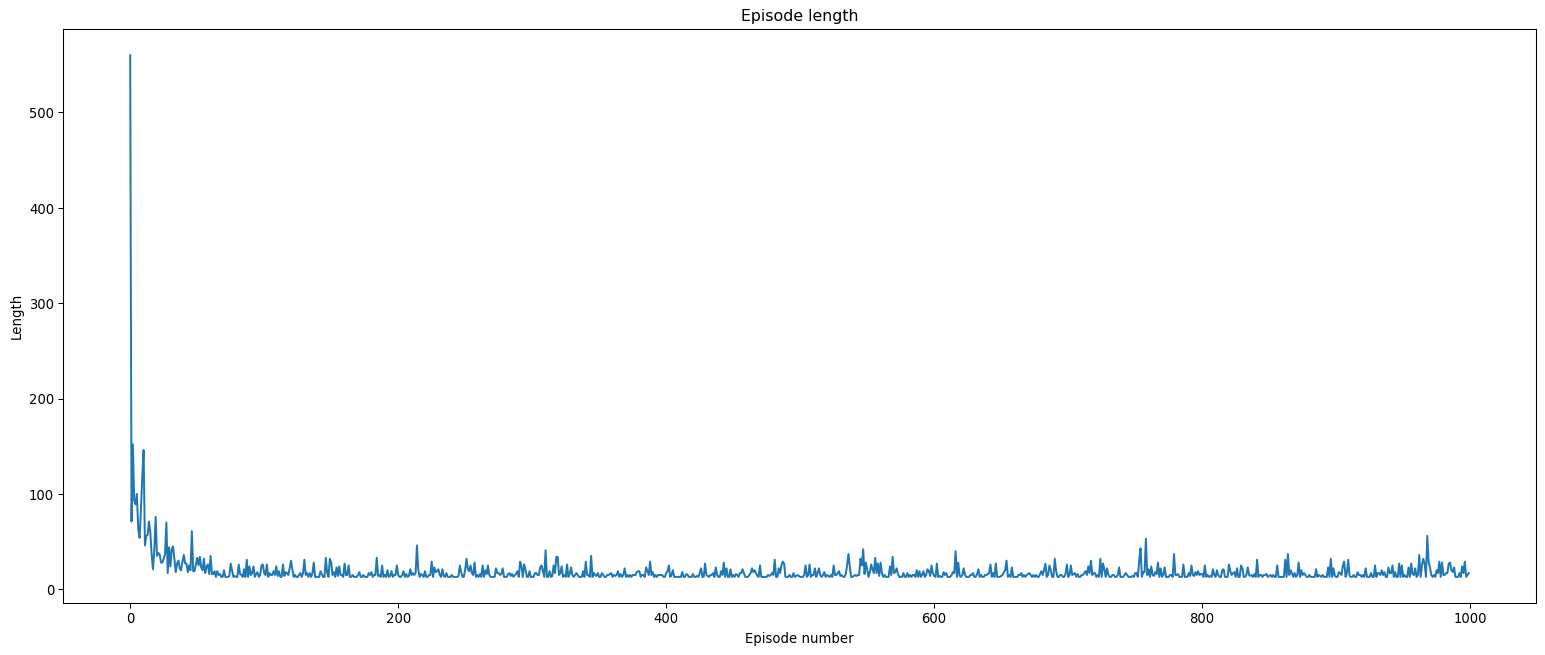

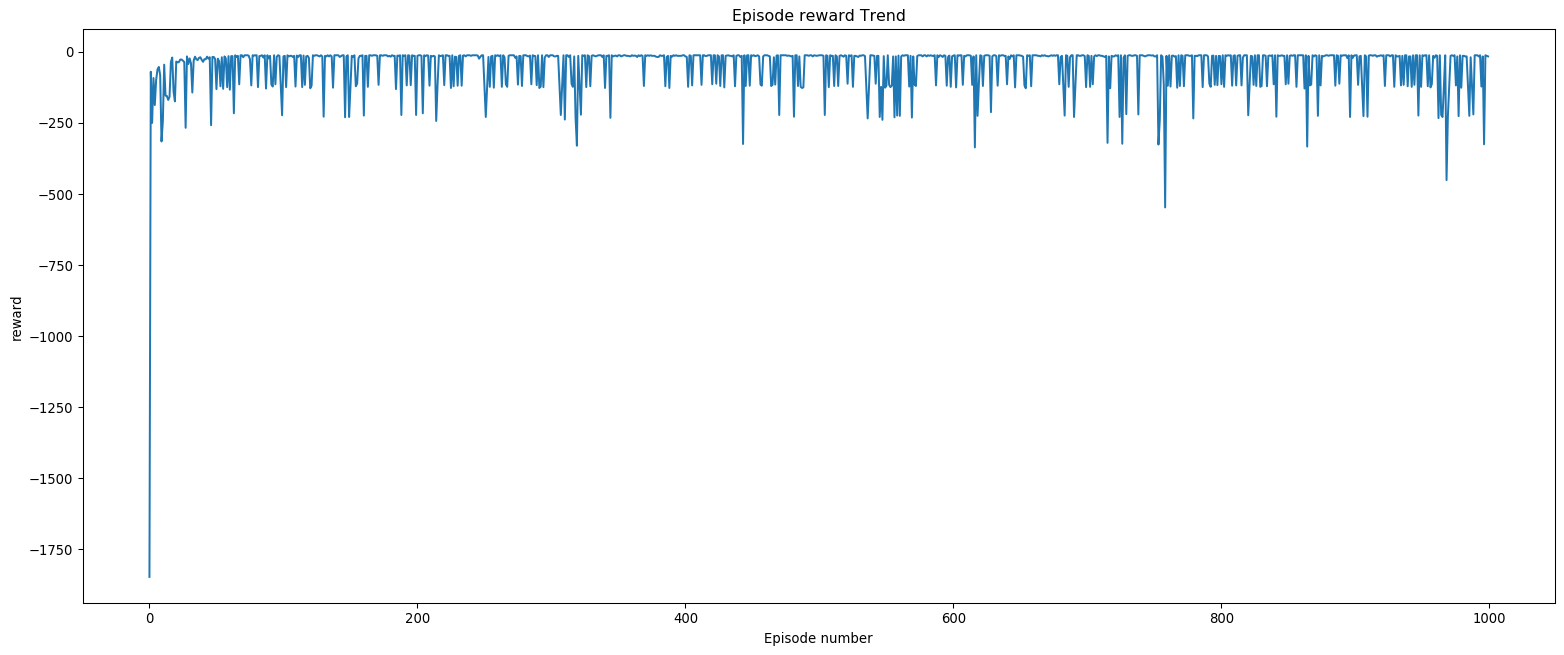

In [18]:
import torch
import gym
from matplotlib.pyplot import figure
from collections import defaultdict

gamma = 1
episodes = 1000
alpha = 0.4
epsilon = 0.1

env = gym.make('CliffWalking-v0')

def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function


def q_learning(env, gamma, episodes, alpha):
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(episodes):
        state = env.reset()
        is_done = False
        while not is_done:

            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            Q[state][action] += alpha * td_delta

            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            
            if is_done:
                break
            state = next_state

    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy



epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

length_episode = [0] * episodes
total_reward_episode = [0] * episodes


optimal_Q, optimal_policy = q_learning(env, gamma, episodes, alpha)


print('The optimal policy:\n', optimal_policy)

import matplotlib.pyplot as plt
figure(num=None, figsize=(20, 8), dpi=95)    
plt.plot(length_episode)
plt.title('Episode length')
plt.xlabel('Episode number')
plt.ylabel('Length')
plt.show()

figure(num=None, figsize=(20, 8), dpi=95)    
plt.plot(total_reward_episode)
plt.title('Episode reward Trend')
plt.xlabel('Episode number')
plt.ylabel('reward')
plt.show()